<a href="https://colab.research.google.com/github/LeticiaVieirg/crack_thermal_detection/blob/main/Yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Treinamento do Yolo

1. Configurar ambiente

In [6]:
!pip install ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="cai4.yaml", epochs=50, imgsz=640)

Transferred 499/561 items from pretrained weights
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=cai4.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

100%|██████████| 91.1M/91.1M [00:02<00:00, 42.4MB/s]
Unzipping /content/datasets/crack-seg.zip to /content/datasets/crack-seg...: 100%|██████████| 8061/8061 [00:02<00:00, 3495.06file/s]

Dataset download success ✅ (5.5s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tru

  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/datasets/crack-seg/train/labels... 3717 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3717/3717 [00:02<00:00, 1522.01it/s]


train: New cache created: /content/datasets/crack-seg/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 157.7±55.0 MB/s, size: 15.1 KB)


val: Scanning /content/datasets/crack-seg/valid/labels... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 545.80it/s]

val: New cache created: /content/datasets/crack-seg/valid/labels.cache


Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.1G      1.343      2.795      2.036      1.304         11        640: 100%|██████████| 233/233 [01:35<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        200        249      0.494      0.584      0.476      0.199      0.342       0.29      0.177     0.0416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.69G      1.374      1.783      1.509      1.296         12        640: 100%|██████████| 233/233 [01:29<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        200        249      0.447      0.518      0.406      0.174      0.187      0.229     0.0663     0.0135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.69G      1.363      1.748      1.384        1.3         10        640: 100%|██████████| 233/233 [01:29<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        200        249       0.43      0.466      0.352      0.156      0.278      0.438      0.196     0.0483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.69G      1.302      1.753      1.269      1.261         12        640: 100%|██████████| 233/233 [01:31<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        249      0.416       0.53      0.338      0.155      0.308      0.394       0.19     0.0454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.69G      1.247      1.675      1.235      1.246         12        640: 100%|██████████| 233/233 [01:31<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        200        249      0.516      0.594       0.48      0.236      0.398      0.458      0.264     0.0614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.69G       1.21      1.683      1.192      1.223         12        640: 100%|██████████| 233/233 [01:29<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        200        249      0.635      0.647       0.62      0.326      0.533      0.542      0.409      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.69G      1.158      1.641       1.14      1.194         14        640: 100%|██████████| 233/233 [01:28<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        200        249      0.743      0.671      0.695      0.398       0.62       0.53      0.449      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.69G      1.143      1.625      1.112      1.199         14        640: 100%|██████████| 233/233 [01:27<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        200        249      0.682      0.671       0.68      0.406      0.566      0.554      0.473      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.71G      1.134      1.588      1.092      1.194          6        640: 100%|██████████| 233/233 [01:30<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        200        249      0.732       0.67       0.69      0.401      0.621      0.578      0.525      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.72G      1.101      1.587      1.061      1.179         17        640: 100%|██████████| 233/233 [01:27<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        200        249       0.78      0.659      0.731       0.43      0.684      0.578      0.537      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.74G      1.071       1.57      1.029      1.157         17        640: 100%|██████████| 233/233 [01:29<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        249      0.719      0.699      0.697      0.453      0.605       0.59      0.532      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.74G      1.054      1.568      1.006      1.151         15        640: 100%|██████████| 233/233 [01:28<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        200        249      0.686      0.699      0.697      0.458      0.571      0.586      0.497      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.77G      1.053      1.566     0.9924      1.153         13        640: 100%|██████████| 233/233 [01:27<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        200        249      0.776      0.727      0.743      0.465      0.673      0.631      0.557      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.79G      1.025      1.533     0.9676       1.14         12        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        200        249      0.745      0.694       0.69      0.469      0.618      0.622      0.512      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       3.8G      1.005      1.532     0.9607      1.136         16        640: 100%|██████████| 233/233 [01:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        200        249      0.765      0.671        0.7      0.438      0.667      0.586      0.532      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.81G     0.9995      1.538     0.9458       1.13         12        640: 100%|██████████| 233/233 [01:29<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        200        249      0.706      0.691       0.71      0.475      0.598      0.562        0.5      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.83G      1.005      1.575     0.9435      1.133         12        640: 100%|██████████| 233/233 [01:28<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        200        249      0.808      0.679      0.743      0.481      0.662      0.614      0.567      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.85G       0.98      1.523     0.9102       1.12         19        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        200        249      0.792      0.657      0.743      0.533       0.69      0.573       0.57      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.87G     0.9671      1.528     0.9038      1.115         11        640: 100%|██████████| 233/233 [01:27<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        200        249      0.789      0.715      0.757      0.528      0.697      0.618      0.574       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.87G     0.9499      1.487     0.8997      1.103         14        640: 100%|██████████| 233/233 [01:28<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        200        249      0.781      0.688      0.746      0.523      0.685      0.612      0.581       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.9G     0.9659      1.513     0.8952      1.116         13        640: 100%|██████████| 233/233 [01:27<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


                   all        200        249      0.758      0.723      0.752      0.537      0.686      0.655      0.598      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.91G     0.9532      1.483     0.8773      1.103         18        640: 100%|██████████| 233/233 [01:28<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        200        249      0.866      0.671      0.763      0.534      0.746      0.578      0.573      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.93G     0.9385       1.48     0.8596        1.1         12        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        200        249      0.804      0.695      0.726       0.49      0.688       0.61      0.557      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.94G     0.9227      1.465     0.8597      1.099         13        640: 100%|██████████| 233/233 [01:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        200        249      0.784      0.755      0.768      0.526      0.654      0.631      0.553      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.96G     0.9257      1.484     0.8506      1.091         18        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        200        249      0.819      0.671      0.742      0.519       0.71      0.566      0.532      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.98G     0.9255      1.505     0.8528      1.092         12        640: 100%|██████████| 233/233 [01:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        200        249       0.79      0.719      0.755      0.557      0.713      0.643      0.617      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         4G     0.9116      1.486     0.8446      1.092         12        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        200        249      0.842      0.675      0.746      0.539      0.747      0.598      0.589      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         4G     0.9021      1.474     0.8358      1.087         11        640: 100%|██████████| 233/233 [01:27<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        200        249      0.814      0.719      0.762      0.549      0.735      0.614      0.593      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G     0.9006      1.473      0.839      1.082         18        640: 100%|██████████| 233/233 [01:28<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        200        249      0.815      0.719      0.756      0.557      0.686      0.606      0.563       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.05G     0.9008       1.49     0.8307      1.076         14        640: 100%|██████████| 233/233 [01:27<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        200        249      0.809      0.733      0.772       0.57      0.734      0.643      0.615      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.06G     0.8987      1.461     0.8082      1.087         12        640: 100%|██████████| 233/233 [01:27<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        200        249      0.784      0.742      0.768       0.54      0.679      0.664      0.598      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.07G     0.8881      1.471     0.7938      1.078         15        640: 100%|██████████| 233/233 [01:28<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        200        249        0.8      0.683       0.76      0.559      0.701      0.598      0.597      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.1G     0.8691      1.451     0.7943      1.073         17        640: 100%|██████████| 233/233 [01:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        200        249      0.807      0.699       0.78      0.564      0.679      0.621      0.592       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.11G     0.8743      1.444     0.7793      1.074          8        640: 100%|██████████| 233/233 [01:27<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        200        249       0.79       0.74      0.776      0.565      0.665      0.627      0.567      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.13G     0.8603      1.434     0.7762      1.065          7        640: 100%|██████████| 233/233 [01:27<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        200        249      0.812      0.751      0.806      0.582      0.716      0.663      0.638      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.13G     0.8509      1.443     0.7613      1.061         21        640: 100%|██████████| 233/233 [01:28<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        200        249      0.834      0.687      0.777       0.57      0.727      0.598      0.614      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.16G     0.8563      1.438     0.7592      1.065         14        640: 100%|██████████| 233/233 [01:27<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        200        249      0.743      0.767      0.784      0.571      0.653      0.679      0.599      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.17G     0.8422      1.443     0.7482      1.053         18        640: 100%|██████████| 233/233 [01:28<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        200        249      0.842      0.708      0.787      0.592      0.755      0.643       0.63      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.19G     0.8496      1.424     0.7641      1.057         16        640: 100%|██████████| 233/233 [01:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        200        249      0.802      0.695       0.77      0.576      0.724      0.632      0.649      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.2G      0.819      1.415     0.7278      1.044         17        640: 100%|██████████| 233/233 [01:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        200        249      0.812      0.755       0.79      0.597      0.737      0.691      0.654      0.216


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.23G     0.7609      1.088     0.7726       1.13          9        640: 100%|██████████| 233/233 [01:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        200        249      0.843      0.719      0.797      0.606      0.763      0.631      0.654      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.25G     0.7498      1.072     0.7372       1.12          5        640: 100%|██████████| 233/233 [01:19<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        200        249      0.813      0.727      0.793      0.606      0.728      0.647      0.655      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.26G     0.7329      1.063     0.7195       1.11          8        640: 100%|██████████| 233/233 [01:19<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        200        249      0.808      0.727      0.779      0.587      0.706      0.666      0.645      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.27G     0.7194      1.064     0.7164      1.102          8        640: 100%|██████████| 233/233 [01:17<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        200        249      0.849      0.747      0.817      0.634      0.753      0.691      0.684      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.29G     0.7181       1.06     0.6967      1.105          5        640: 100%|██████████| 233/233 [01:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        200        249      0.821      0.736      0.784      0.602      0.756      0.663      0.653       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.31G     0.6952      1.056     0.6727      1.088          6        640: 100%|██████████| 233/233 [01:20<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        200        249      0.811      0.723      0.795       0.61      0.715      0.635      0.656      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.33G     0.6908      1.051     0.6616      1.091          6        640: 100%|██████████| 233/233 [01:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        200        249      0.835      0.735      0.795      0.622      0.762      0.659      0.661      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.33G     0.6797      1.047     0.6709      1.076         10        640: 100%|██████████| 233/233 [01:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        200        249       0.88      0.709      0.799      0.625       0.77      0.675      0.663      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.36G     0.6612      1.035     0.6461      1.067          5        640: 100%|██████████| 233/233 [01:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        200        249       0.82      0.747      0.802      0.622      0.743      0.675      0.654      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.38G     0.6698       1.04     0.6444      1.083          5        640: 100%|██████████| 233/233 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        200        249      0.856      0.741      0.801      0.629      0.768      0.665      0.655      0.223



50 epochs completed in 1.250 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 6.0MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:02,  2.34it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:01<00:03,  1.25it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.30s/it]


                   all        200        249      0.849      0.747      0.817      0.634      0.754      0.691      0.684      0.226
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/segment/train4


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model on the Crack Segmentation dataset
# Ensure 'crack-seg.yaml' is accessible or provide the full path
results = model.train(data="crack-seg.yaml", epochs=100, imgsz=640)

# After training, the model can be used for prediction or expo
# results = model.predict(source='path/to/your/images')

In [28]:
import os

path = "runs/segment/train4/weights/best.pt"
if os.path.exists(path):
    print("Modelo encontrado!")
    model = YOLO(path)
else:
    print("Erro: Arquivo não encontrado. Verifique o caminho.")

Modelo encontrado!


In [29]:
import os

path = "runs/segment/train4/weights/"
print(os.listdir(path))  # Lista os arquivos na pasta

['last.pt', 'best.pt']


In [30]:
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')

In [31]:
# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("/content/runs/segment/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1016.2±324.4 MB/s, size: 54.0 KB)


val: Scanning /content/datasets/coco8-seg/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all          4         17      0.631       0.95      0.913      0.654      0.174       0.25      0.212      0.126
                person          3         10      0.589        0.7      0.671      0.344          0          0    0.00331   0.000662
                   dog          1          1      0.534          1      0.995      0.796          0          0          0          0
                 horse          1          2      0.607          1      0.995      0.649          0          0          0          0
              elephant          1          2      0.562          1      0.828      0.342      0.266        0.5      0.276     0.0598
              umbrella          1          1      0.562          1      0.995      0.895          0          0          0          0
          potted plant          1          1      0.933          1      0.995      0.895      0.779          1      0.995      0.697
Speed: 0.5ms preprocess, 15.2ms inference, 0.0ms loss, 15.0ms postpro

array([ 0.00066236,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,           0,           0,     0.12616,     0.12616,    0.059779,     0.12616,     0.12616,     0.12616,
           0.12616,           0,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,
           0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,      0.6965,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,     0.12616,
           0.12616,     0.12616,     0.1261

In [32]:
with open("cai2.yaml", "r", encoding='utf-8') as f:
    print(f.read())


path: /content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset
train: '/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train'
val: '/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Validation'

nc: 2
names: ["Faulty", "Healthy"] 


In [34]:
import os
import json

# Verifica estrutura
train_img_path = "/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/images"
train_label_path = "/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/cai.json"

# Conta arquivos
num_images = len(os.listdir(train_img_path))

print(f"Imagens: {num_images}")

# Verifica o arquivo de anotações
if os.path.isfile(train_label_path):
    with open(train_label_path, 'r') as f:
        annotations = json.load(f)
        print(f"\nO arquivo de anotações contém {len(annotations)} itens")
        print("\nExemplo de anotação:")
        print(annotations[0])  # Mostra a primeira anotação

Imagens: 2351

O arquivo de anotações contém 22 itens

Exemplo de anotação:
{'image_key': 'Areial_Faulty117.jpg', 'image_dimensions': {'height': 300, 'width': 300}, 'cracks': [{'label': 'crack', 'type': 'polygon', 'bounding_box': {'x': 114, 'y': 165, 'width': 12, 'height': 24}, 'polygon_points': [[120, 153], [108, 153], [108, 177], [120, 177], [120, 153]]}]}


Imagens disponíveis para análise:
1. Healthy_Train136.jpg
2. Healthy_Train1339.jpg
3. Healthy_Train1376.jpg
4. Healthy_Train135.jpg
5. Healthy_Train1352.jpg

Analisando imagem: Areial_Faulty246.jpg

image 1/1 /content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/images/Areial_Faulty246.jpg: 640x640 3 cracks, 11.5ms
Speed: 3.1ms preprocess, 11.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


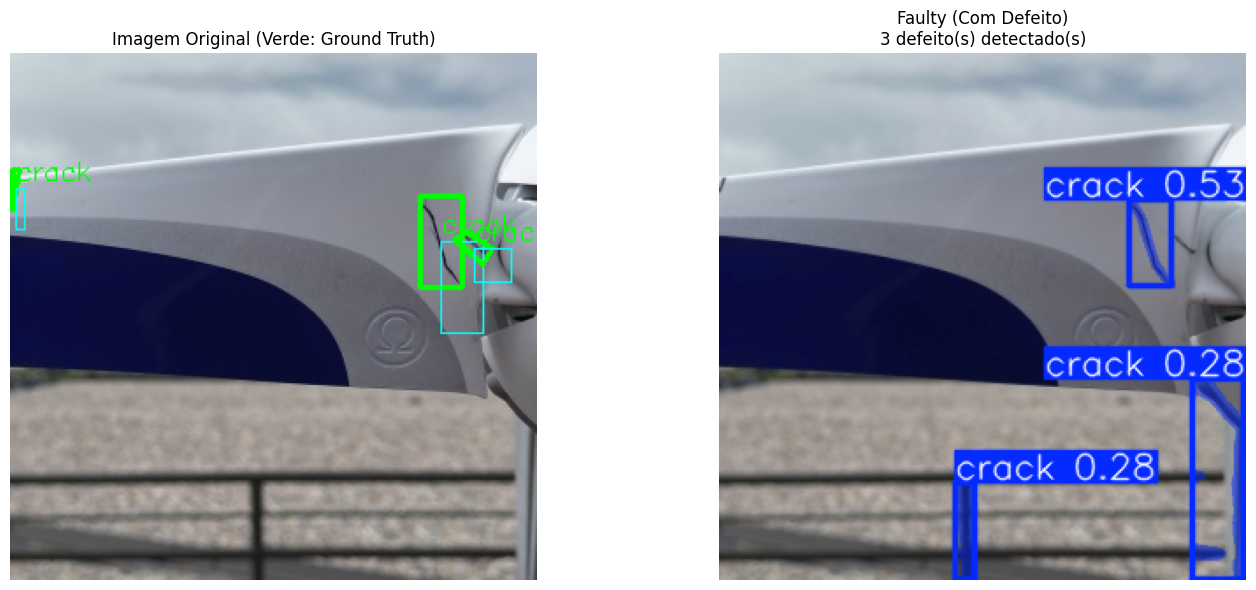


Análise da Imagem
Arquivo analisado: /content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/images/Areial_Faulty246.jpg
Dimensões: 300x300

Defeitos detectados:

Defeito 1:
- Tipo: crack
- Confiança: 52.90%
- Coordenadas: [234, 84, 258, 132]
- Área: 1165 px²

Defeito 2:
- Tipo: crack
- Confiança: 28.22%
- Coordenadas: [270, 185, 299, 300]
- Área: 3312 px²

Defeito 3:
- Tipo: crack
- Confiança: 27.92%
- Coordenadas: [135, 244, 145, 300]
- Área: 592 px²

Ground Truth :
Total de fissuras esperadas: 3

fissura 1:
- Tipo: crack
- Bounding Box: x=245.0, y=107.0, width=24.0, height=52.0
- Área BB: 1248.0 px²
- Pontos do polígono: [[257, 81], [233, 81], [233, 133], [257, 133]]

fissura 2:
- Tipo: crack
- Bounding Box: x=264.2, y=111.0, width=21.5, height=19.7
- Área BB: 425.3 px²
- Pontos do polígono: [[259.81, 101.15], [274.994, 111.739], [269.319, 120.897], [253.455, 106.193]]

fissura 3:
- Tipo: crack
- Bounding Box: x=3.4, y=77.6, width=4.6, height=22.9
- Áre

In [35]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Carrega o modelo treinado
model = YOLO("/content/runs/segment/train4/weights/best.pt")

def analyze_defects(image_path, annotations_json=None):
    # Verifica se a imagem existe
    if not os.path.exists(image_path):
        print(f"\nErro: Arquivo de imagem não encontrado em {image_path}")
        print("Por favor, verifique o caminho e tente novamente.")
        return

    # Faz a previsão
    try:
        results = model(image_path)
    except Exception as e:
        print(f"\nErro durante a predição: {e}")
        return

    # Carrega as anotações se o JSON foi fornecido
    ground_truth = None
    image_name = os.path.basename(image_path)

    if annotations_json and os.path.exists(annotations_json):
        try:
            with open(annotations_json, 'r') as f:
                annotations = json.load(f)

                # Procura pelas anotações da imagem atual
                for item in annotations:
                    if item.get('image_key') == image_name:
                        ground_truth = item
                        break
        except Exception as e:
            print(f"\nErro ao ler anotações: {e}")

    # Processa os resultados
    for result in results:
        # Configura a figura
        plt.figure(figsize=(15, 6))

        # Imagem original
        plt.subplot(1, 2, 1)
        original_img = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)

        if ground_truth:
            # Desenha os polígonos das fissuras
            for crack in ground_truth.get('cracks', []):
                # Converte pontos do polígono para array numpy
                points = np.array(crack['polygon_points'], np.int32)
                points = points.reshape((-1, 1, 2))

                # Desenha o polígono
                cv2.polylines(original_img, [points], isClosed=True, color=(0, 255, 0), thickness=2)

                # Desenha a bounding box
                bbox = crack['bounding_box']
                x, y = float(bbox['x']), float(bbox['y'])
                w, h = float(bbox['width']), float(bbox['height'])
                x1, y1 = int(x), int(y)
                x2, y2 = int(x + w), int(y + h)
                cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 255), 1)

                # Adiciona label
                cv2.putText(original_img, crack['label'], (x1, y1-5),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            plt.title('Imagem Original (Verde: Ground Truth)')
        else:
            plt.title('Imagem Original')

        plt.imshow(original_img)
        plt.axis('off')

        # Imagem com predições
        plt.subplot(1, 2, 2)
        annotated_img = result.plot()
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))

        # Status da análise
        if len(result.boxes) > 0:
            status = "Faulty (Com Defeito)"
            defects_count = len(result.boxes)
            plt.title(f"{status}\n{defects_count} defeito(s) detectado(s)")
        else:
            plt.title("Healthy (Saudável)")

        plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Saída detalhada
        print("\nAnálise da Imagem")
        print(f"Arquivo analisado: {image_path}")
        print(f"Dimensões: {result.orig_img.shape[1]}x{result.orig_img.shape[0]}")

        if len(result.boxes) > 0:
            print("\nDefeitos detectados:")
            for i, box in enumerate(result.boxes, 1):
                xyxy = box.xyxy[0].tolist()
                conf = box.conf.item()
                cls = int(box.cls.item())
                label = model.names[cls]

                print(f"\nDefeito {i}:")
                print(f"- Tipo: {label}")
                print(f"- Confiança: {conf:.2%}")
                print(f"- Coordenadas: {[round(x) for x in xyxy]}")
                print(f"- Área: {(xyxy[2]-xyxy[0])*(xyxy[3]-xyxy[1]):.0f} px²")
        else:
            print("Nenhum defeito detectado.")

        if ground_truth:
            print("\nGround Truth :")
            print(f"Total de fissuras esperadas: {len(ground_truth.get('cracks', []))}")
            for i, crack in enumerate(ground_truth.get('cracks', []), 1):
                bbox = crack['bounding_box']
                x, y = float(bbox['x']), float(bbox['y'])
                w, h = float(bbox['width']), float(bbox['height'])

                print(f"\nfissura {i}:")
                print(f"- Tipo: {crack['label']}")
                print(f"- Bounding Box: x={x:.1f}, y={y:.1f}, width={w:.1f}, height={h:.1f}")
                print(f"- Área BB: {w*h:.1f} px²")
                print(f"- Pontos do polígono: {crack['polygon_points']}")

#Listagem das imagens disponíveis
train_img_dir = "/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/images"
available_images = [f for f in os.listdir(train_img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not available_images:
    print("Nenhuma imagem encontrada no diretório especificado.")
else:
    print("Imagens disponíveis para análise:")
    for i, img in enumerate(available_images[:5]):
        print(f"{i+1}. {img}")

    # Pmagem como exemplo
    sample_image = "Areial_Faulty246.jpg"
    image_path = os.path.join(train_img_dir, sample_image)
    annotations_json = "/content/drive/Shareddrives/Leticia_Vieira_G_Pesquisa/dataset/CAI-SWTB-Dataset/Train/cai.json"

    print(f"\nAnalisando imagem: {sample_image}")
    analyze_defects(image_path, annotations_json)

In [37]:
from yaml import safe_load

with open("/content/runs/segment/train2/args.yaml", 'r') as f:
    args = safe_load(f)

print("\nHiperparâmetros usados no treinamento:")
print(f"Epocas: {args['epochs']}")
print(f"Batch size: {args['batch']}")
print(f"Taxa de aprendizado: {args['lr0']}")
print(f"Augmentação: {args['augment']}")
print(f"Ratio de validação: {args['val']}")


Hiperparâmetros usados no treinamento:
Epocas: 50
Batch size: 16
Taxa de aprendizado: 0.01
Augmentação: False
Ratio de validação: True


teinamento yolo

In [23]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 118MB/s]


In [25]:
import os

model = YOLO('yolov11n-seg.yaml')

#Treinar dataset
results =model.train(data="")
)

# 3. Validar o modelo
metrics = model.val()
print(f"mAP@0.5: {metrics.box.map50:.3f}")

FileNotFoundError: 'yolov11n-seg.yaml' does not exist

avaliacao do modelo

In [ ]:
# Após obter detecções, comparar com o ground truth e ajustar
if ground_truth:
    for crack_gt in ground_truth["cracks"]:
        # Verifica se há alguma predição muito próxima da anotação
        # Caso contrário, pode forçar uma "caixa sugerida" no resultado


SyntaxError: incomplete input (<ipython-input-19-2a77834aee01>, line 5)

In [ ]:
import pandas as pd

results = pd.read_csv("/content/runs/segment/train2/results.csv")
print(results.tail())  # Mostra as últimas épocas (onde o modelo converge)

Data augmentation

In [ ]:
# Adicione no dataset.yaml
augmentation:
  hsv_h: 0.015  # Variação de matiz
  hsv_s: 0.7    # Variação de saturação
  hsv_v: 0.4    # Variação de valor
  degrees: 45   # Rotação
  translate: 0.1 # Translação
  scale: 0.5    # Escala
  shear: 0.1    # Cisalhamento
  flipud: 0.5   # Flip vertical
  fliplr: 0.5   # Flip horizontal

SyntaxError: invalid syntax (<ipython-input-21-9d38eeb811e5>, line 2)

Hiperparametros

Avaliacao

In [ ]:
import numpy as np

def evaluate_cracks(model, val_loader):
    stats = {'TP': 0, 'FP': 0, 'FN': 0}

    for batch in val_loader:
        images, targets = batch
        results = model(images)

        for result, target in zip(results, targets):
            # Implementar lógica específica para rachaduras
            pred_boxes = result.boxes.xyxy.cpu().numpy()
            true_boxes = target['boxes'].numpy()

            # Métrica para objetos alongados
            for pred in pred_boxes:
                w = pred[2] - pred[0]
                h = pred[3] - pred[1]
                aspect_ratio = max(w,h)/min(w,h)

                if aspect_ratio > 5:  # Rachaduras são alongadas
                    # Lógica de matching com ground truth
                    ...

    precision = stats['TP'] / (stats['TP'] + stats['FP'] + 1e-6)
    recall = stats['TP'] / (stats['TP'] + stats['FN'] + 1e-6)
    print(f"Precisão para rachaduras: {precision:.2%}")
    print(f"Recall para rachaduras: {recall:.2%}")

Validacao do modelo

In [ ]:
metrics = model.val(data='/content/cai2.yaml')

NameError: name 'model' is not defined